In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('review_dataset_v2.csv')

## Column Types

* Numerical - review , rating, date, sentiment score, sentiment magnitude, confident
* Categorical - company , country, review class, deletected lang, category
* Mixed - name , topic, content, positive class, negative class

## Univariate Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1456 non-null   object 
 1   review               1456 non-null   float64
 2   rating               1456 non-null   int64  
 3   company              1456 non-null   object 
 4   country              1456 non-null   object 
 5   date                 1456 non-null   object 
 6   topic                1456 non-null   object 
 7   content              1456 non-null   object 
 8   sentiment_score      1456 non-null   float64
 9   sentiment_magnitude  1456 non-null   float64
 10  entities             1456 non-null   object 
 11  review_class         1456 non-null   object 
 12  positive_reasons     1456 non-null   object 
 13  negative_reasons     1456 non-null   object 
 14  detected_language    1456 non-null   object 
 15  category             700 non-null    o

In [5]:
df.describe()

,review,rating,sentiment_score,sentiment_magnitude,confidence
count,1456.000000,1456.000000,1456.000000,1456.000000,681.000000
mean,5.976648,1.940247,-0.392514,0.780769,0.692291
std,13.457001,1.597636,0.620247,0.280502,0.142589
min,1.000000,1.000000,-0.900000,0.000000,0.500000
25%,1.000000,1.000000,-0.800000,0.700000,0.560000
50%,2.000000,1.000000,-0.700000,0.700000,0.670000
75%,5.000000,2.000000,-0.500000,0.800000,0.810000
max,172.000000,5.000000,0.900000,4.000000,0.990000


#### Review

* Conclusion
    1. This data is is highly skew 
    2. Most people gave around 1 to 5 review. more then half of them are those who gave 2 review.
    3. Too many outlines are in data but still need to keep them or no need to change that

In [6]:
df['review'].describe()

count    1456.000000
mean        5.976648
std        13.457001
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       172.000000
Name: review, dtype: float64

In [7]:
df[df.duplicated()]

,name,review,rating,company,country,date,topic,content,sentiment_score,sentiment_magnitude,entities,review_class,positive_reasons,negative_reasons,detected_language,category,confidence


In [8]:
df[df['review'] > 50].count()

name                   23
review                 23
rating                 23
company                23
country                23
date                   23
topic                  23
content                23
sentiment_score        23
sentiment_magnitude    23
entities               23
review_class           23
positive_reasons       23
negative_reasons       23
detected_language      23
category               16
confidence             15
dtype: int64

<Axes: xlabel='review', ylabel='Count'>

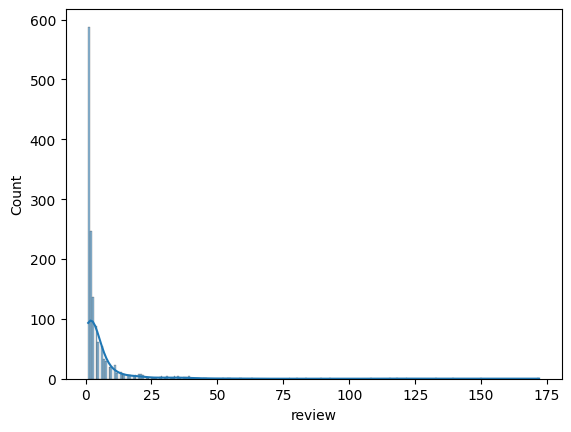

In [9]:
sns.histplot(df['review'], kde=True)

<Axes: ylabel='Frequency'>

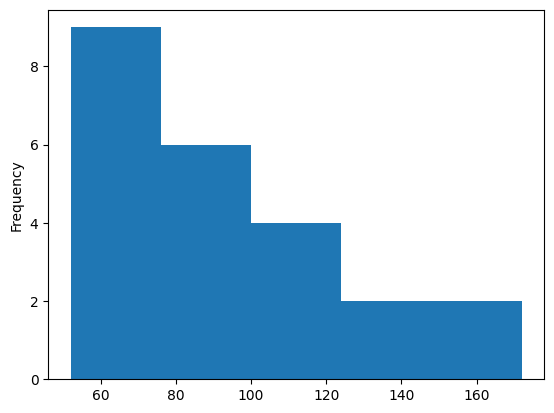

In [10]:
df[df['review'] > 50]['review'].plot(kind='hist', bins=5)

<Axes: ylabel='Density'>

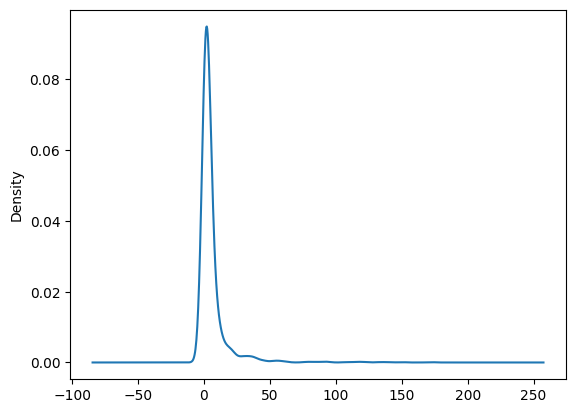

In [11]:
df['review'].plot(kind='kde')

In [12]:
df['review'].skew()

np.float64(6.449684920728695)

<Axes: >

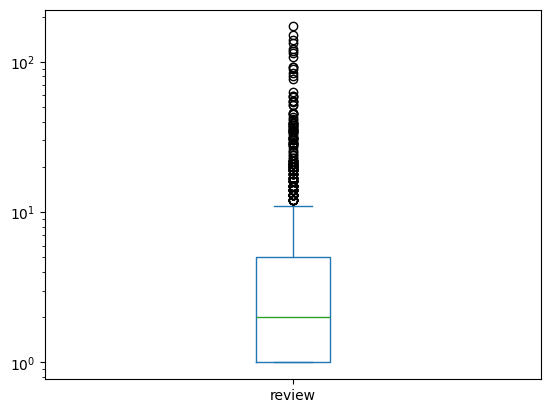

In [13]:
df['review'].plot(kind='box', logy=True)

In [14]:
print(df.review.min())
print(df.review.max())
print(df.review.quantile(.25))
print(df.review.quantile(.50))
print(df.review.quantile(.75))
print(df.review.mean())
print(df.review.median())
print(df.review.mode().values[0])

1.0
172.0
1.0
2.0
5.0
5.976648351648351
2.0
1.0


In [15]:
review_std = df['review'].std()

In [81]:
review_mean = df['review'].mean()
review_mean

np.float64(5.976648351648351)

In [82]:
review_std

np.float64(13.457000529852516)

In [83]:
low = review_mean - 3 * review_std
low

np.float64(-34.3943532379092)

In [84]:
high = review_mean + 3*review_std
high

np.float64(46.3476499412059)

In [99]:
tempdf = df[(df['review'] < low) | (df['review'] > high)]
tempdf.head()

,name,review,rating,company,country,date,topic,content,sentiment_score,sentiment_magnitude,entities,review_class,positive_reasons,negative_reasons,detected_language,category,confidence
26,p fisher,93.0,1,amazon,united kingdom,2024-10-01 18:51:01,criminal behaviour,i told amazon to cancel an order the driver st...,-0.7,0.7,"neighbours, driver, amazon, order, money, refu...",negative,no_positive,i told amazon to cancel an order the driver st...,en,NaN,NaN
81,stephen n.,59.0,1,amazon,united kingdom,2024-10-01 10:32:11,80 minutes wasted on their customer services,i had an offer as a loyal customer to get grea...,-0.7,0.7,"benefits, customer, barclaycard, offer, one, q...",negative,no_positive,i had an offer as a loyal customer to get grea...,en,finance,0.67
83,joanne collins,54.0,1,amazon,united kingdom,2024-10-01 07:38:38,still no account,well i left it for a week hoping my amazon acc...,-0.8,0.8,"account, amazon, telephone number, telephone n...",negative,no_positive,well i left it for a week hoping my amazon acc...,en,NaN,NaN
123,dmac,77.0,1,amazon,united kingdom,2024-10-01 03:50:34,prime big deal what do you take me for,come on amazon treat me seriously a ceiling s...,0.2,0.2,"deal, amazon, ceiling spotlight, sale, bargain...",positive,come on amazon treat me seriously a ceiling s...,no_negative,en,home & garden',0.76
130,ian wooller,122.0,1,amazon,united kingdom,2024-10-01 09:18:33,cancelled order,they cancelled an order that was going to be d...,-0.8,0.8,"order, customer, anything, reason",negative,no_positive,they cancelled an order that was going to be d...,en,arts & entertainment',0.55


In [110]:
df['review'].skew()

np.float64(6.449684920728695)

In [111]:
df['review'].kurtosis()

np.float64(53.946585552372824)

In [27]:
df['review_log'] = np.log1p(df['review'])


In [28]:
df['review_sqrt'] = np.sqrt(df['review'])


In [26]:
from scipy import stats
df['review_boxcox'], lam = stats.boxcox(df['review'] + 1e-6)


In [29]:
from scipy import stats
stat, p_value = stats.shapiro(df['review_sqrt'].dropna())  
print('Shapiro-Wilk Test p-value:', p_value)

Shapiro-Wilk Test p-value: 2.6034417937400104e-47


In [30]:
df.head()

,name,review,rating,company,country,date,topic,content,sentiment_score,sentiment_magnitude,entities,review_class,positive_reasons,negative_reasons,detected_language,category,confidence,review_boxcox,review_log,review_sqrt
0,vladimiro mascaro,3.0,1,amazon,united kingdom,2024-10-01 18:25:37,4 months of total incopetence,since july until this month of all my orders 8...,-0.6,0.6,"orders, orders, thing, direct debit, headphone...",negative,no_positive,since july until this month of all my orders 8...,en,shopping',0.62,8.326414e-01,1.386294,1.732051
1,lucy loo,9.0,1,amazon,united kingdom,2024-10-01 09:57:32,driver stealing,as a family we order from amazon almost daily ...,-0.8,0.8,"amazon, family, change, one, nothing, packages...",negative,no_positive,as a family we order from amazon almost daily ...,en,NaN,NaN,1.297622e+00,2.302585,3.000000
2,da,21.0,5,amazon,united kingdom,2024-10-01 11:36:09,where is the negativity coming from,probably the only store that 1 delivers ontime...,0.1,0.1,"store, customers, prices, competitors, valuefo...",positive,probably the only store that 1 delivers ontime...,no_negative,en,NaN,NaN,1.510468e+00,3.091042,4.582576
3,vicki study,1.0,1,amazon,united kingdom,2024-10-01 15:36:33,absolutely appalling customer service,the customer service has been absolutely appal...,-0.7,0.7,"customer service, calls, ive, fault, issue, am...",negative,no_positive,the customer service has been absolutely appal...,en,NaN,NaN,9.999992e-07,0.693147,1.000000
4,jeffrey bruce,5.0,1,amazon,united kingdom,2024-10-01 17:09:02,amazon are quick enough to take payment,amazon are quick enough to take payment for or...,-0.7,0.7,"amazon, payment, orders, worst, claim, custome...",negative,no_positive,amazon are quick enough to take payment for or...,en,shopping',0.62,1.082533e+00,1.791759,2.236068


### Rating

In [32]:
df['rating'].value_counts()

rating
1    1031
5     279
2      74
3      37
4      35
Name: count, dtype: int64

<Axes: ylabel='count'>

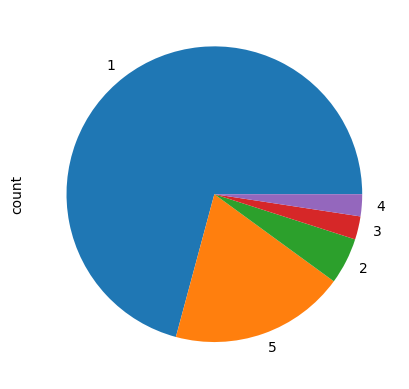

In [39]:
df['rating'].value_counts().plot(kind='pie')

In [47]:
df['date'] = pd.to_datetime(df['date'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 1456 non-null   object        
 1   review               1456 non-null   float64       
 2   rating               1456 non-null   int64         
 3   company              1456 non-null   object        
 4   country              1456 non-null   object        
 5   date                 1456 non-null   datetime64[ns]
 6   topic                1456 non-null   object        
 7   content              1456 non-null   object        
 8   sentiment_score      1456 non-null   float64       
 9   sentiment_magnitude  1456 non-null   float64       
 10  entities             1456 non-null   object        
 11  review_class         1456 non-null   object        
 12  positive_reasons     1456 non-null   object        
 13  negative_reasons     1456 non-nul

### Sentiment Analysis

In [50]:
df['sentiment_score'].value_counts()

sentiment_score
-0.7    552
-0.8    385
 0.9    199
-0.6    127
 0.8     47
-0.5     27
-0.4     21
-0.3     18
 0.1     10
 0.7     10
 0.6      9
-0.9      9
-0.2      9
 0.3      8
 0.0      7
-0.1      6
 0.2      4
 0.4      4
 0.5      4
Name: count, dtype: int64

In [51]:
df['sentiment_score'].describe()

count    1456.000000
mean       -0.392514
std         0.620247
min        -0.900000
25%        -0.800000
50%        -0.700000
75%        -0.500000
max         0.900000
Name: sentiment_score, dtype: float64

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

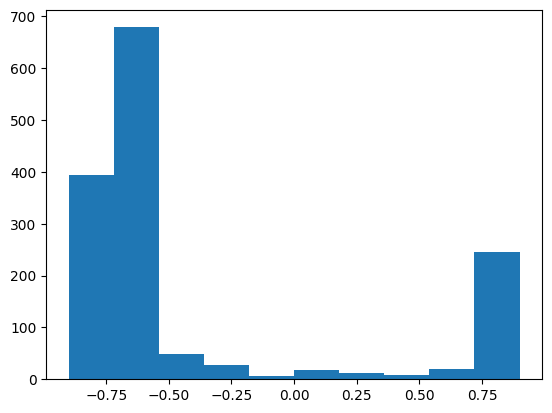

In [53]:
df['sentiment_score'].plot(kind='hist', kde=True)